In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset and creating DataFrames 

In [2]:
df = pd.read_csv('PBL5Recommendationdata.csv', encoding = 'latin-1')

In [3]:
#Çok fazla boş veri var
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [6]:
pd.set_option('display.max_columns',200)

In [95]:
df.head(25)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 18:22:44,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
df.shape

(4194, 181)

In [9]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,0.0,0.0,4194.000000,4194.000000,4191.000000,0.0,0.0,24.000000,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,NaN,NaN,1.858846,67.349132,51.112718,NaN,NaN,1.666667,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
s

In [10]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,16.06,NaN,16706988SV3261147,NaN,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bag

In [11]:
#Establishing the dataframe
#Customers.id
#Customers.company
#Customers.status
#Customers.sales_rep
#Customers.customer_type
#Orders.subtotal
#Orders.shipping
#Orders.total
#Orders.payment_status
#Products.price
#Products.multiple
#Products.case_qty
#Products.size
#Products.material

In [12]:
dfa = df[['Customers.id','Customers.company','Customers.status','Customers.sales_rep','Customers.customer_type','Orders.subtotal','Orders.shipping','Orders.total','Orders.payment_status','Products.price','Products.multiple','Products.case_qty','Products.size','Products.material']]

In [13]:
dfa.head()

,Customers.id,Customers.company,Customers.status,Customers.sales_rep,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,Products.multiple,Products.case_qty,Products.size,Products.material
0,797,Company0,NaN,NaN,0.0,57.20,9.95,64.29,3.0,57.64,1 EA,1.0,NaN,NaN
1,3,Company1,NaN,NaN,0.0,20.00,9.99,29.99,3.0,10.29,1 EA,1.0,NaN,NaN
2,3,Company1,NaN,NaN,0.0,68.78,9.95,78.73,3.0,68.78,1 CS,800.0,2 x Extra large,Nitrile
3,4,NaN,NaN,NaN,0.0,19.56,9.95,29.55,3.0,19.56,1 EA,1.0,NaN,NaN
4,5,Company3,0.0,NaN,0.0,36.05,9.95,46.00,3.0,36.05,1 EA,1.0,NaN,NaN


In [14]:
dfa.isnull().sum()

Customers.id                  0
Customers.company          3467
Customers.status           4093
Customers.sales_rep        4194
Customers.customer_type     423
Orders.subtotal               0
Orders.shipping             195
Orders.total                  0
Orders.payment_status         5
Products.price              158
Products.multiple          1230
Products.case_qty          1556
Products.size              2751
Products.material          3392
dtype: int64

In [15]:
dfa.drop(['Customers.company','Customers.status','Customers.sales_rep','Products.multiple','Products.case_qty','Products.size','Products.material'], axis=1, inplace = True)

In [16]:
dfa.isnull().sum()

Customers.id                 0
Customers.customer_type    423
Orders.subtotal              0
Orders.shipping            195
Orders.total                 0
Orders.payment_status        5
Products.price             158
dtype: int64

In [17]:
dfa['Customers.customer_type'].value_counts()

0.0    3319
1.0     386
2.0      66
Name: Customers.customer_type, dtype: int64

In [18]:
dfa['Customers.customer_type'].fillna(dfa['Customers.customer_type'].median(), inplace = True)

In [19]:
dfa['Orders.shipping'].value_counts()

9.95     2758
0.00     1110
6.71       16
6.45       15
5.05       14
19.41       8
6.52        7
6.73        7
6.68        4
9.05        3
17.00       3
7.16        3
9.99        3
0.50        2
0.51        2
6.26        2
7.90        2
6.85        2
7.17        2
11.29       2
5.92        2
6.95        1
6.74        1
9.10        1
9.12        1
23.67       1
12.13       1
7.49        1
6.10        1
32.81       1
7.85        1
6.46        1
6.12        1
11.18       1
6.89        1
17.33       1
6.93        1
17.70       1
2.91        1
8.59        1
0.99        1
15.00       1
5.54        1
7.35        1
6.51        1
9.53        1
8.86        1
8.17        1
9.14        1
26.12       1
19.99       1
6.63        1
13.95       1
Name: Orders.shipping, dtype: int64

In [20]:
dfa['Orders.shipping'].fillna(dfa['Orders.shipping'].median(), inplace = True)

In [21]:
dfa['Products.price'].value_counts()

199.99     134
23.65       88
58.87       72
95.99       54
189.99      52
          ... 
465.58       1
32.87        1
45.32        1
100.69       1
1099.00      1
Name: Products.price, Length: 1234, dtype: int64

In [22]:
dfa['Products.price'].fillna(dfa['Products.price'].mean(), inplace = True)

In [23]:
dfa['Orders.payment_status'].value_counts()

3.0    4115
1.0      50
0.0      24
Name: Orders.payment_status, dtype: int64

In [24]:
dfa['Orders.payment_status'].fillna(dfa['Orders.payment_status'].median(), inplace = True)

In [25]:
dfa.isnull().sum()

Customers.id               0
Customers.customer_type    0
Orders.subtotal            0
Orders.shipping            0
Orders.total               0
Orders.payment_status      0
Products.price             0
dtype: int64

In [26]:
dfCustomers = df[['Customers.id','Customers.customer_type']]
dfOrders = df[['Orders.subtotal','Orders.shipping','Orders.total','Orders.payment_status']]
dfProducts = df[['Products.price']]

In [27]:
dfCustomers.head()

,Customers.id,Customers.customer_type
0,797,0.0
1,3,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [28]:
dfOrders.head()

,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status
0,57.20,9.95,64.29,3.0
1,20.00,9.99,29.99,3.0
2,68.78,9.95,78.73,3.0
3,19.56,9.95,29.55,3.0
4,36.05,9.95,46.00,3.0


In [29]:
dfProducts.head()

,Products.price
0,57.64
1,10.29
2,68.78
3,19.56
4,36.05


### Inserting dataframes into SQLite database

In [30]:
import sqlite3
cnx = sqlite3.connect(':memory:')

** #price2.to_sql(name='price2', con=cnx)
#### This or SQLAlchemy Engine
from sqlalchemy import create_engine
#e = create_engine('sqlite://')  # pass your db url
#price2.to_sql(name='price2', con=cnx)

#### Writing df to sqlite
import pandas as pd
import sqlite3 as sq

df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
table_name = "test" # table and file name

conn = sq.connect('{}.sqlite'.format(table_name)) # creates file
df.to_sql(table_name, conn, if_exists='replace', index=False) # writes to file
conn.close() # good practice: close connection

#### Reading sqlite to df
conn = sq.connect('{}.sqlite'.format(table_name))
df = pd.read_sql('select * from {}'.format(table_name), conn)
conn.close()

In [31]:
dfCustomers.to_sql(name='Customers', con=cnx)
dfOrders.to_sql(name='Orders', con=cnx)
dfProducts.to_sql(name='Products', con=cnx)

4194

In [32]:
Customers = pd.read_sql('select * from Customers', cnx).drop("index", axis = 1)
Orders = pd.read_sql('select * from Orders', cnx).drop("index", axis = 1)
Products = pd.read_sql('select * from Products', cnx).drop("index", axis = 1)

In [33]:
cnx.close()

In [34]:
Orders.head()

,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status
0,57.20,9.95,64.29,3.0
1,20.00,9.99,29.99,3.0
2,68.78,9.95,78.73,3.0
3,19.56,9.95,29.55,3.0
4,36.05,9.95,46.00,3.0


In [35]:
dfc = pd.concat([Customers, Orders, Products])

In [36]:
dfc.head()

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price
0,797.0,0.0,NaN,NaN,NaN,NaN,NaN
1,3.0,0.0,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN,NaN
3,4.0,0.0,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,NaN,NaN,NaN,NaN,NaN


### Creating the RFM Table

In [37]:
import datetime
import datetime as dt
df['Customers.last_modified'] = df['Customers.last_modified'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [38]:
df['Customers.last_modified'].head()

0    1970-01-17 18:22:44
1    1970-01-17 18:22:44
2    1970-01-17 18:22:44
3    1970-01-17 18:22:42
4    1970-01-17 18:22:44
Name: Customers.last_modified, dtype: object

In [39]:
df_x = df.groupby('Customers.id').agg({'Orders.subtotal': lambda x: x.sum(), 'Customers.last_modified': lambda x: x.max()})

In [40]:
df_y = df.groupby(['Customers.id','Order_Items.product_id']).agg({'Orders.subtotal': lambda x: x.sum()})

In [41]:
df_z = df_y.groupby('Customers.id').agg({'Orders.subtotal': lambda x: len(x)})

In [42]:
rfm_table = pd.merge(df_x,df_z, on='Customers.id')

In [43]:
rfm_table.rename(columns= {'Customers.last_modified': 'Recency',
                          'Orders.subtotal_y': 'Frequency',
                          'Orders.subtotal_x': 'Money'}, inplace= True)

In [44]:
rfm_table.head()

,Money,Recency,Frequency
Customers.id,,,
3,88.78,1970-01-17 18:22:44,2
4,19.56,1970-01-17 18:22:42,1
5,95.14,1970-01-17 18:22:44,3
7,39.19,1970-01-17 18:22:43,1
8,59.75,1970-01-17 18:22:43,1


### Modelling

In [45]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans

In [48]:
dfcopy = dfa.copy()

In [49]:
dfcopy

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price
0,797,0.0,57.20,9.95,64.29,3.0,57.64
1,3,0.0,20.00,9.99,29.99,3.0,10.29
2,3,0.0,68.78,9.95,78.73,3.0,68.78
3,4,0.0,19.56,9.95,29.55,3.0,19.56
4,5,0.0,36.05,9.95,46.00,3.0,36.05
...,...,...,...,...,...,...,...
4189,3730,0.0,14.85,0.00,16.06,3.0,23.65
4190,3732,0.0,39.99,9.95,39.99,1.0,69.99
4191,3733,0.0,1099.00,9.95,989.10,1.0,1099.00
4192,3735,0.0,129.99,0.00,129.99,3.0,129.99


In [51]:
x = dfcopy.drop(["Customers.id"],axis=1)

In [52]:
scaler = scale

In [53]:
x_scaled = pd.DataFrame(scaler(x))

In [54]:
x_scaled.sample(7)

,0,1,2,3,4,5
1098,-0.330414,0.018928,0.599984,-0.004006,0.131335,-0.057728
872,-0.330414,4.400458,-1.629110,4.539860,0.131335,11.086784
2953,-0.330414,-0.397765,0.599984,-0.391493,0.131335,-0.365449
1445,-0.330414,-0.457905,0.599984,-0.513895,0.131335,-0.485835
1818,-0.330414,0.068987,-1.629110,0.047907,0.131335,-0.574551
2427,2.344792,0.600940,0.599984,0.644214,0.131335,0.041098
3032,-0.330414,-0.045408,0.599984,-0.080552,0.131335,0.228846


In [55]:
x_scaled.shape

(4194, 6)

In [56]:
model = KMeans(random_state = 42)

In [57]:
model.fit_predict(x_scaled)

array([0, 0, 0, ..., 5, 1, 3])

In [58]:
#ssd = sum of squared distance
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(x_scaled)
    ssd.append(model.inertia_)

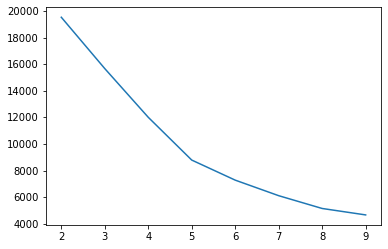

In [61]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [62]:
ssd

[19541.249285875732,
 15675.870221365632,
 12010.29995855419,
 8790.044004658765,
 7279.275568655538,
 6108.716458721061,
 5145.964861510335,
 4661.400205641135]

In [67]:
from yellowbrick.cluster import KElbowVisualizer

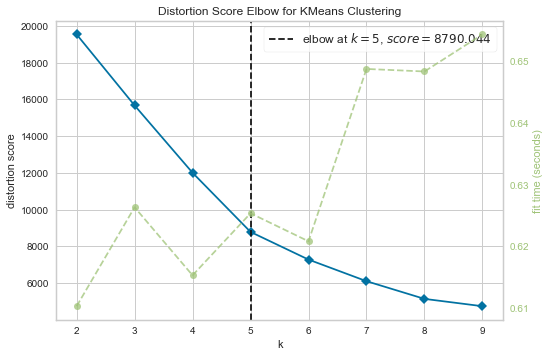

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x_scaled)
visu.poof()

In [82]:
model = KMeans(n_clusters=4)
model.fit(x_scaled)

KMeans(n_clusters=4)

In [83]:
dfcopy["cluster"] = model.labels_

In [84]:
dfcopy["cluster"].value_counts()

0    2997
3    1021
1     106
2      70
Name: cluster, dtype: int64

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
silhouette_score(x_scaled, dfcopy.cluster)

0.5010176044581122

In [87]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7305932796208418
For n_clusters=3, the silhouette score is 0.47451661836237424
For n_clusters=4, the silhouette score is 0.5010176044581122
For n_clusters=5, the silhouette score is 0.584855788930739
For n_clusters=6, the silhouette score is 0.5918062559985973
For n_clusters=7, the silhouette score is 0.5986125240540524
For n_clusters=8, the silhouette score is 0.5824316681809398


In [88]:
dfcopy

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster
0,797,0.0,57.20,9.95,64.29,3.0,57.64,0
1,3,0.0,20.00,9.99,29.99,3.0,10.29,0
2,3,0.0,68.78,9.95,78.73,3.0,68.78,0
3,4,0.0,19.56,9.95,29.55,3.0,19.56,0
4,5,0.0,36.05,9.95,46.00,3.0,36.05,0
...,...,...,...,...,...,...,...,...
4189,3730,0.0,14.85,0.00,16.06,3.0,23.65,3
4190,3732,0.0,39.99,9.95,39.99,1.0,69.99,2
4191,3733,0.0,1099.00,9.95,989.10,1.0,1099.00,1
4192,3735,0.0,129.99,0.00,129.99,3.0,129.99,3


In [89]:
dfcopy[dfcopy["cluster"]==0]

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster
0,797,0.0,57.20,9.95,64.29,3.0,57.64,0
1,3,0.0,20.00,9.99,29.99,3.0,10.29,0
2,3,0.0,68.78,9.95,78.73,3.0,68.78,0
3,4,0.0,19.56,9.95,29.55,3.0,19.56,0
4,5,0.0,36.05,9.95,46.00,3.0,36.05,0
...,...,...,...,...,...,...,...,...
4149,3691,0.0,12.25,9.95,22.20,3.0,12.25,0
4150,3692,2.0,95.98,9.95,105.93,3.0,47.99,0
4178,3720,0.0,60.40,9.95,64.31,3.0,60.40,0
4181,3723,0.0,255.56,9.95,265.51,3.0,63.89,0


In [90]:
dfcopy[dfcopy["cluster"]==1]

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster
101,100,0.0,663.75,9.95,673.70,3.0,221.250000,1
102,100,0.0,1327.50,0.00,1261.12,3.0,221.250000,1
103,100,0.0,885.00,0.00,850.00,3.0,221.250000,1
141,143,0.0,2653.30,0.00,2300.00,3.0,265.330000,1
142,143,0.0,1513.85,0.00,1380.00,3.0,74.266043,1
...,...,...,...,...,...,...,...,...
3630,3174,0.0,2164.30,0.00,2164.30,3.0,133.860000,1
3631,3174,0.0,2164.30,0.00,2164.30,3.0,74.266043,1
3686,3234,0.0,3000.00,0.00,2588.00,3.0,150.000000,1
4122,3662,0.0,633.96,0.00,570.56,3.0,736.250000,1


In [91]:
dfcopy[dfcopy["cluster"]==2]

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster
5,5,0.0,44.46,9.95,54.41,0.0,74.266043,2
26,26,0.0,35.00,9.95,35.00,0.0,74.266043,2
97,84,0.0,76.70,9.95,92.02,0.0,82.330000,2
118,114,0.0,144.70,9.95,154.65,0.0,72.900000,2
159,160,0.0,110.58,19.41,129.99,0.0,199.990000,2
...,...,...,...,...,...,...,...,...
4186,3728,0.0,47.97,0.00,43.17,1.0,20.930000,2
4187,3728,0.0,47.97,0.00,43.17,1.0,25.550000,2
4188,3729,0.0,17.52,9.95,27.47,1.0,17.520000,2
4190,3732,0.0,39.99,9.95,39.99,1.0,69.990000,2


In [92]:
dfcopy[dfcopy["cluster"]==3]

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster
31,27,0.0,17.88,0.51,18.39,3.0,24.59,3
32,27,0.0,17.88,0.51,18.39,3.0,24.59,3
68,55,0.0,431.55,0.00,431.55,3.0,46.80,3
69,55,0.0,431.55,0.00,431.55,3.0,150.75,3
70,55,0.0,280.80,0.00,280.80,3.0,46.80,3
...,...,...,...,...,...,...,...,...
4142,3683,0.0,154.93,0.00,168.68,3.0,154.93,3
4144,3686,0.0,29.70,0.00,29.70,3.0,23.65,3
4152,3696,0.0,15.31,0.00,15.31,3.0,15.31,3
4189,3730,0.0,14.85,0.00,16.06,3.0,23.65,3


In [93]:
dfcopy[dfcopy["cluster"]==4]

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price,cluster


In [94]:
dfcopy.groupby("cluster").mean()

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_status,Products.price
cluster,,,,,,,
0,1802.074741,0.129129,96.789366,9.902179,104.479283,3.000000,63.304916
1,1713.216981,0.122642,1212.364623,3.191509,1192.685660,2.896226,320.587418
2,2702.757143,0.271429,144.850286,6.815857,152.677571,0.700000,61.232860
3,1726.723800,0.096964,122.004280,0.005798,122.576063,3.000000,81.761396


In [96]:
dfcopy["customer_type"] = dfcopy["cluster"].map({0:"low budget",
                                          1:"luxury/high budget",
                                          2:"did not pay ",
                                          3:"medium budget"})

In [97]:
dfcopy["customer_type"]

0               low budget
1               low budget
2               low budget
3               low budget
4               low budget
               ...        
4189         medium budget
4190          did not pay 
4191    luxury/high budget
4192         medium budget
4193          did not pay 
Name: customer_type, Length: 4194, dtype: object

In [99]:
output = pd.DataFrame({"Customer ID":dfcopy["Customers.id"], "Customer Type":dfcopy["customer_type"]})

In [100]:
output.shape

(4194, 2)

In [101]:
output

,Customer ID,Customer Type
0,797,low budget
1,3,low budget
2,3,low budget
3,4,low budget
4,5,low budget
...,...,...
4189,3730,medium budget
4190,3732,did not pay
4191,3733,luxury/high budget
4192,3735,medium budget


In [102]:
output.to_csv("customer_segmentation.csv",index = False)